In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import random
import copy
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

In [2]:
def PCA(X , num_components, rvar):
     
    X_meaned = (X - np.mean(X , axis = 0)) / np.std(X, axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = rvar)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose())#.transpose()
     
    return X_reduced

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
reduced_iris = PCA(iris_data.iloc[:,0:3], 2, False)
#plt.scatter(reduced_iris[0], reduced_iris[1], color='r', s = 1)

In [4]:
from datetime import datetime

other_data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
df = other_data.drop(columns = ['Flight #', 'Route', 'Type', 'Summary', 'cn/In', 'Registration', 'Location', 'Ground'])

operators = df['Operator'].unique()
Operators = dict()
for i in range(len(operators)):
    Operators[operators[i]] = i

df = df.replace({'Operator': Operators})

df  = df.dropna()

df['DateTime'] = (df['Date'] + " " + df['Time']).astype("string")
df = df[df['DateTime'].str.contains(r'^\d{2}/\d{2}/\d{4} \d{1,2}\:\d{1,2}$')]
df['DateTime'] = pd.to_datetime(df['DateTime'], format = '%m/%d/%Y %H:%M')
df['DateTime'] = df['DateTime'].astype('int64') #df['DateTime'].to_timestamp
df = df.drop(columns = ['Date', 'Time'])

#df = df[df['Date'].str.contains(r'^\d{2}/\d{2}/\d{4}$')]
#df = df[df['Time'].str.contains(r'^\d{1,2}\:\d{1,2}$')]
#df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
#df['Date'] = df['Date'].astype('int64') 
#df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M')
#df['Time'] = df['Time'].astype('int64') 

df = df.sample(frac=1).reset_index(drop=True)

#print(df)
df.head()

reduced_other = PCA(df.iloc[:,[0,3]], 2, False)
#plt.scatter(reduced_other[0], reduced_other[1], color='r', s = 1)

In [16]:
locals = []
avg_timespans = []
gr_freqs = []
avg_sizes = []
icmp_packets = []
i = 0;

with open('window_data.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        nums = line.strip().split(' ')
        locals.append(int(nums[0]))
        avg_timespans.append(float(nums[1]))
        gr_freqs.append(int(nums[2]))
        avg_sizes.append(float(nums[3]))
        icmp_packets.append(int(nums[4]))

observations = np.vstack(( 
                        np.array(avg_timespans),
                        np.array(locals),
                        np.array(gr_freqs), 
                        np.array(avg_sizes), 
                        #np.array(icmp_packets)
                        ))
observations = observations.transpose()
reduced_observations = PCA(observations, 2, False)

reduced_observations = reduced_observations[0:2, 0:50000]
plt.scatter(reduced_observations[0], reduced_observations[1], s = 10)

SyntaxError: '(' was never closed (2270081862.py, line 18)

In [6]:
heart_data = pd.read_csv("heart_disease_uci.csv")

df = heart_data.dropna()

place = df['dataset'].unique()
cp = df['cp'].unique()
restecg = df['restecg'].unique()
slope = df['slope'].unique()
thal = df['thal'].unique()

Df, Place, Cp, Restecg, Slope, Thal = dict(), dict(), dict(), dict(), dict(), dict()

for i in range(len(place)):
    Place[place[i]] = i
df = df.replace({'dataset': Place})

for i in range(len(cp)):
    Cp[cp[i]] = i
df = df.replace({'cp': Cp})

for i in range(len(restecg)):
    Restecg[restecg[i]] = i
df = df.replace({'restecg': Restecg})

for i in range(len(slope)):
    Slope[slope[i]] = i
df = df.replace({'slope': Slope})

for i in range(len(thal)):
    Thal[thal[i]] = i
df = df.replace({'thal': Thal})

bln = {True : 1, False: 0} # fbs exang
sex = {'Male': 0, 'Female': 1}

df = df.replace({'fbs': bln, 'exang': bln, 'sex': sex})

df = df.drop(columns = ['sex', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset'])

reduced_heart = PCA(df.iloc[:,[1, 8]], 2, False)
#plt.scatter(reduced_heart[0], reduced_heart[1], color='r', s = 1)
#df.head()
#print(df)

In [7]:
def calc_euclidian(v1, v2):
    sub2 = np.subtract(v1,v2)**2
    sumsqrt = (sub2[0] + sub2[1])**(1/2)
    return sumsqrt

def calc_mahalanobis(v1, v2, cov_inv):
    dim = len(v1)
    delta = []
    for i in range(dim):
            delta.append(v1[i] - v2[i])
    deltaS = []
    for i in range(dim):
        deltaS.append(0);
        for j in range(dim):
            deltaS[i] += delta[j]*cov_inv[j][i]
    d = 0;
    for i in range(dim):
        d += deltaS[i]*delta[i]
    return d;

In [8]:
def euclidian(array, cluster, n ,k ,dim): 
	cluster_content = [[] for i in range(k)]

	for i in range(n):
		min_distance = float('inf')
		situable_cluster = -1
		for j in range(k):
			distance = 0
			for q in range(dim):
				distance += (array[i][q]-cluster[j][q])**2
						
			distance = distance**(1/2)
			if distance < min_distance:
				min_distance = distance
				situable_cluster = j

		cluster_content[situable_cluster].append(array[i])
		
	return cluster_content

def cluster_update(cluster, cluster_content, dim):
	k = len(cluster)
	for i in range(k): #по i кластерам
		for q in range(dim): #по q параметрам
			updated_parameter = 0
			for j in range(len(cluster_content[i])): 
				updated_parameter += cluster_content[i][j][q]
			if len(cluster_content[i]) != 0:
				updated_parameter = updated_parameter / len(cluster_content[i])
			cluster[i][q] = updated_parameter
	return cluster

max_cluster_value = -40

def kmeans(array, k):
	n = len(array)  
	dim = len(array[0])

	
	cluster = [[0 for i in range(dim)] for q in range(k)] 
	cluster_content = [[] for i in range(k)] 

	for i in range(dim):
		for q in range(k):
			cluster[q][i] = random.randint(max_cluster_value, 0) 

	cluster_content = euclidian(array, cluster, n , k, dim)

	privious_cluster = copy.deepcopy(cluster)
	while 1:
		cluster = cluster_update(cluster, cluster_content, dim)
		cluster_content = euclidian(array, cluster, n, k, dim)
		if cluster == privious_cluster:
			return cluster, cluster_content
		privious_cluster = copy.deepcopy(cluster)

In [9]:
def clusterization(array, default_radius, stdiv_coef, cnt_euclidian):

	# 1. пустой набор кластеров
	centers = []		#список точек - центров кластеров
	radiuses = []		#радиусы кластеров
	cluster_content = []#списки точек для каждого кластера
	sum1 = []			#суммы xi, yi для каждого кластера
	sum2 = []			#суммы xi^2, yi^2 для кажого кластера
	inv_cov_mats = []	#обратные ковариационные матрицы
	cov_mats = []		#ковариационные матрицы для визуализации

	def new_cluster(center):
		centers.append(center)
		radiuses.append(default_radius**2)
		cluster_content.append([center])
		sum1.append(np.array(center))
		sum2.append(np.array(center)**2)
		inv_cov_mats.append([[1,0],[0,1]])
		cov_mats.append([[1,0],[0,1]])

	def update_center(ind): 
		centers[ind] = sum1[ind]/len(cluster_content[ind])
	
	def update_radius(ind):
		stdiv = sum2[ind]/len(cluster_content[ind]) - np.array(centers[ind])**2
		radius = stdiv[0]+stdiv[1] 
		radiuses[ind] = radius

	def remove_cluster(ind):
		centers.pop(ind)
		radiuses.pop(ind)
		cluster_content.pop(ind)
		sum1.pop(ind)
		sum2.pop(ind)
		inv_cov_mats.pop(ind)
		cov_mats.pop(ind)

	def update_inv_cov_mat(ind):
		if len(cluster_content[ind]) < cnt_euclidian: return
		content = np.array(cluster_content[ind]).transpose()
		_cov_matrix = np.cov(content[0], content[1], bias = True)
		cov_mats[ind] = _cov_matrix
		if np.linalg.det(_cov_matrix) != 0:
			_inv_cov_matrix = np.linalg.inv(_cov_matrix)
			inv_cov_mats[ind] = _inv_cov_matrix

	def merge(couple):
		# чтобы не сломалась индексация, нужно в кластер с меньшим индексом
		# внести содержимое второго кластера; тогда при удалении второго
		# кластера индекс первого останется правильным, он будет 
		# использоваться в цикле на следующей итерации  
		couple.sort()
		ind = couple.pop(0) # индекс первого кластера
		rem = couple[0] 			# индекс второго кластера
		# складываются суммы xi, yi, xi^2, yi^2
		sum1[ind] = sum1[ind] + sum1[rem]
		sum2[ind] = sum2[ind] + sum2[rem]
		# объединяются списки точек
		cluster_content[ind] += cluster_content[rem]
		# пересчитывается центр и радиус кластера, получившегося
		# путем объединения двух других кластеров
		update_center(ind) 
		update_radius(ind)
		update_inv_cov_mat(ind)
		# удаляется оставшийся кластер
		remove_cluster(couple[0])
		return ind

	def second_element(arr):
		return arr[1]

	# 2. для каждой новой точки...
	for i in range(len(array)):
		#print(i)
		filtered = []
		d = 0
		# ...ищем ближайший кластер соответствующего радиуса
		for j in range(len(centers)):
			# d(xi, xk) - расстояние Махаланобиса
			d = calc_mahalanobis(array[i], centers[j], inv_cov_mats[j])
			# ищем минимальное расстояние меньше радиуса потенциального кластера
			if d < radiuses[j]:
				filtered = list(filter(lambda x: x[1] < d, filtered))
				filtered.append([j,d])
		# 4. если такой кластер не найден, создаем новый кластер
		# с центром в этой точке и затравочным радиусом
		if filtered == []:
			new_cluster(array[i])
		# 3. если такой кластер найден,..
		else:
			ind = filtered[0][0]
			sum1[ind] = sum1[ind] + np.array(array[i])
			sum2[ind] = sum2[ind] + np.array(array[i])**2
			#  ...включаем точку в состав этого кластера...
			cluster_content[ind].append(array[i])
			# ...и пересчитываем положение центра и
			# радиус кластера с учетом новой точки
			update_center(ind)
			update_radius(ind)
			update_inv_cov_mat(ind)
			stp = True
			while stp:
				# 5. ищем кластеры, в которые мог войти центр обновленного кластера...
				filtered = []
				for j in range(len(centers)):
					if j == ind: continue
					# ...также с помощью метрики Махаланобиса
					d = calc_mahalanobis(centers[ind], centers[j], inv_cov_mats[j])
					if d < radiuses[j] * stdiv_coef**2:
						filtered.append([j,d])
				# если такие кластеры найдены, берем ближайший
				if filtered != []:
					filtered.sort(key = second_element)
					ind2 = filtered[0][0]
					filtered = [ind, ind2]
					ind = merge(filtered)
				# таким же образом проверяем, поглощает
				# ли обновленный кластер какие-то другие
				else:
					for j in range(len(centers)):
						if j == ind: continue
						d = calc_mahalanobis(centers[j], centers[ind], inv_cov_mats[ind])
						if d < radiuses[ind] * stdiv_coef**2:
							filtered.append([j, d])
					if (filtered == []):
						stp = False
						continue
					filtered.sort(key = second_element)
					ind2 = filtered[0][0]
					filtered = [ind, ind2]
					ind = merge(filtered)

	return centers, cluster_content, radiuses, inv_cov_mats, cov_mats

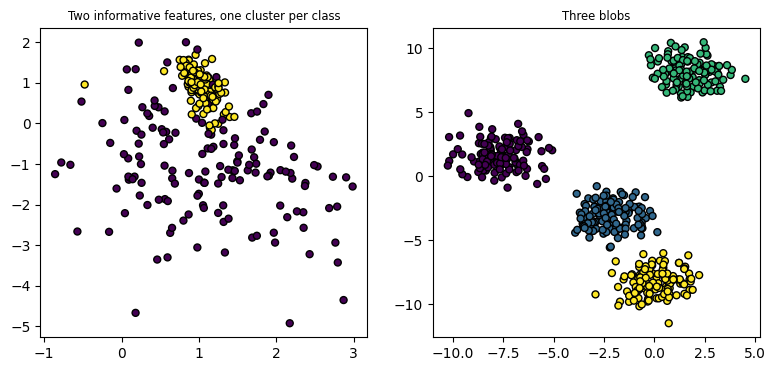

In [10]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

plt.subplot(221)
plt.title("Two informative features, one cluster per class", fontsize="small")
p1, q1 = make_classification(
    n_samples = 300, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(p1[:, 0], p1[:, 1], marker="o", c=q1, s=25, edgecolor="k")

plt.subplot(222)
plt.title("Three blobs", fontsize="small")
p2, q2 = make_blobs(n_samples = 500, n_features=2, centers=4)
plt.scatter(p2[:, 0], p2[:, 1], marker="o", c=q2, s=25, edgecolor="k")

plt.show()

In [11]:
import matplotlib.colors as mcolors

to_clusterize = np.transpose(reduced_observations) 
#p1  
#np.transpose(reduced_iris)

centers, cl, rad, invcovs, covs = clusterization(to_clusterize, 0.9, 2.4, 10)
#(to_clusterize, 0.5, 2.05, 10)
#centers, cl = kmeans(to_clusterize, 2)
print(len(centers), " clusters total")

cl_dots = []
for i in range(len(centers)):
    cl_dots.append(np.array(cl[i]).transpose())

fig, ax = plt.subplots(1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
colors = mcolors.TABLEAU_COLORS
ax.set_prop_cycle

plt.title("Clusterization results", fontsize="small")
for i in range(len(centers)):
    plt.scatter(cl_dots[i][0], cl_dots[i][1], s = 15)
    plt.scatter(centers[i][0], centers[i][1], c = 'black', s = 10, marker = "v")

KeyboardInterrupt: 

6


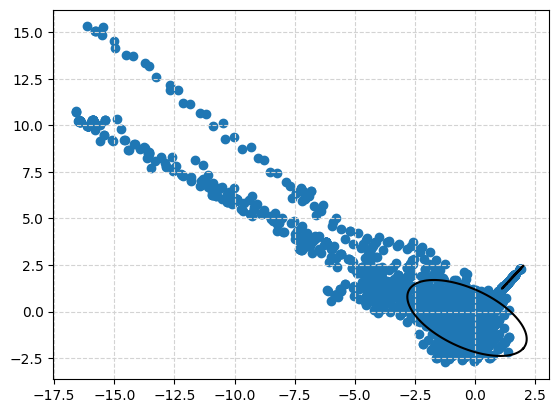

In [ ]:
fig, ax = plt.subplots(1)

plt.scatter(reduced_observations[0], reduced_observations[1])
#(p1.transpose()[0], p1.transpose()[1])
#(reduced_iris[0], reduced_iris[1])

print(len(centers))
for i in range(len(centers)):
    cluster_content = cl[i]
    center = centers[i]
    radius = rad[i]
    #sum2 = np.array([0.,0.])
    #for j in range (len(cluster_content)):
    #    sum2 += cluster_content[j]**2
    #stdiv = sum2/len(cluster_content) - np.array(center)**2
    #radius = stdiv[0]+stdiv[1]

    #content = np.array(cluster_content).transpose()
    
    #_cov_matrix = np.cov(content[0], content[1])

    _cov_matrix = covs[i]
    #_cov_matrix = [[1,0],[0,1]]
    #_inv_cov_matrix = np.linalg.inv(_cov_matrix)#invcov[i]

    eig_vals, eig_vecs = np.linalg.eig(_cov_matrix)

    semi_axes = np.sqrt(eig_vals) * 1.96

    a = semi_axes[0] # radius on the x-axis
    b = semi_axes[1] # radius on the y-axis
    if (a > 10) | (b > 10): continue
    t_rot = np.arctan2(eig_vecs[1][0],eig_vecs[1][1]) #rotation angle

    t = np.linspace(0, 2*np.pi, 100)

    rot = np.array([ # 2-D rotation matrix
                   [np.cos(t_rot) , -np.sin(t_rot)],
                   [np.sin(t_rot) , np.cos(t_rot)]
                   ])  

    ellipse = np.array([a*np.cos(t) , b*np.sin(t)])
    ellipse_rot = np.zeros((2,ellipse.shape[1]))
    for i in range(ellipse.shape[1]):
        ellipse_rot[:,i] = np.dot(rot, ellipse[:,i])

    plt.plot( center[0] + ellipse_rot[0,:] , center[1] + ellipse_rot[1,:], c = "black" )
    plt.grid(color='lightgray',linestyle='--')
plt.show()